#### import beberapa library

In [76]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

#### Task 1 : Merge 12 bulan laporan pejualan ke dalam 1 file

In [14]:
df = pd.read_csv("../Sales_Data/Sales_April_2019.csv")
df.head()

all_mount_datas = pd.DataFrame()

files = [file for file in os.listdir("../Sales_Data/")]
for file in files:
    df = pd.read_csv("../Sales_Data/"+file)
    all_mount_datas = pd.concat([all_mount_datas, df])
    
all_mount_datas.to_csv('all_data.csv', index=False)

#### Membaca file langsung hasil generate/merge diatas , yaitu all_data.csv

In [44]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


#### cleaning data  Menghapus semua row data yang memiliki value nan

In [45]:
all_data = all_data.dropna()
all_data[all_data.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


#### cleaning data Mencari dan menghapus data di kolom Order Date yang bernilai Or

In [67]:
all_data = all_data[all_data["Order Date"].str[0:2] != "Or"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,mouth,total
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.0
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


#### cleaning data Mengubah tipe data kolom Quantity Ordered dan Price Each menjadi numeric

In [68]:
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,mouth,total
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.0
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


### Pertanyaan 1 : Bulan apa yang terbaik dalam penjualan, dan berapa jumlah pendapatan yang didapat dalam bulan itu ?

#### Menambahkan kolom bulan untuk masing2 row berdasarkan kolom Order_Date

In [56]:
all_data["mouth"] = all_data["Order Date"].str[0:2]
all_data["mouth"] = all_data["mouth"].astype("int32") 
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,mouth
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


#### Menambahkan kolom total dari hasil perkalian kolom Price Each dan Quantity Ordered

In [69]:
all_data["total"] = all_data["Price Each"] * all_data["Quantity Ordered"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,mouth,total
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


In [88]:
results = all_data.groupby("mouth").sum()
results["total"]

mouth
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: total, dtype: float64

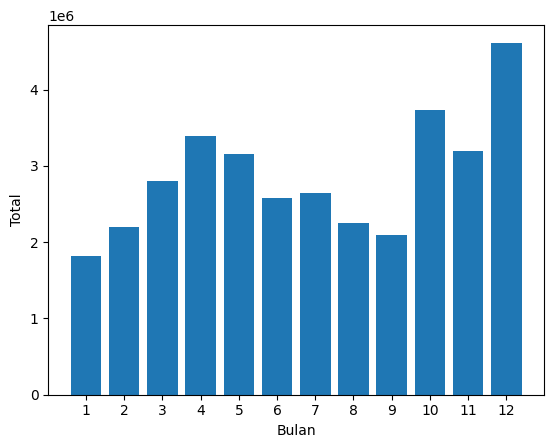

In [89]:
plt.bar(range(1, 13), results["total"])
plt.xticks(range(1, 13))
plt.ylabel("Total")
plt.xlabel("Bulan")
plt.show()

### Pertanyaan 2 : Kota apa yang memiliki pendapatan tertinggi

### Menambahkan kolom kota

In [105]:
def getCity(value):
    secondAddress = value.split(",")
    return secondAddress[1]
all_data["City"] = all_data["Purchase Address"].apply(getCity)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,mouth,total,Kota,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,New York City
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,New York City
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,New York City
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,San Francisco
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,Atlanta


In [131]:
results = all_data[["City", "total"]].groupby("City").sum()
results

,total
City,
Atlanta,2795498.58
Austin,1819581.75
Boston,3661642.01
Dallas,2767975.40
Los Angeles,5452570.80
New York City,4664317.43
Portland,2320490.61
San Francisco,8262203.91
Seattle,2747755.48


In [134]:
# cities = all_data["City"].unique()
cities = [city for city, df in all_data.groupby("City").sum()]
plt.bar(cities, results["total"]);
plt.xticks(cities, rotation="vertical", size=8)
plt.ylabel("total")
plt.xlabel("City")
plt.show()

ValueError: too many values to unpack (expected 2)